In [1]:
from utils.helpers import Summarizer, AttributionVisualizer

### Reproducing the results from the paper with the CSV files in the GitHub repo of https://github.com/josephenguehard/time_interpret

##### HMM main results from the original paper

In [2]:
result = Summarizer("paper_csvs/hmm/results").display_table()  # Key = (method, lambda_1, lambda_2)

+----------------------------------------+-------------------+-------------------+-----------------------+---------------------+-------------------+-------------------+
|                  Key                   |        aup        |        aur        |           I           |          S          |       auroc       |       auprc       |
+----------------------------------------+-------------------+-------------------+-----------------------+---------------------+-------------------+-------------------+
|      ('deep_lift', '1.0', '1.0')       | 0.92038 (0.01850) | 0.45412 (0.01149) |  358.70000 (9.55327)  | 145.20000 (0.94868) | 0.93808 (0.01954) | 0.91154 (0.02455) |
|      ('dyna_mask', '1.0', '1.0')       | 0.71096 (0.02001) | 0.76286 (0.02621) |  954.14000 (50.02153) |  45.35000 (0.78147) | 0.87640 (0.01013) | 0.69498 (0.00813) |
|    ('extremal_mask', '1.0', '1.0')     | 0.88482 (0.03022) | 0.78098 (0.01319) | 1535.80000 (78.95695) |  34.05000 (3.70072) | 0.90958 (0.01289) | 0.8826

##### HMM ablation study from the original paper

In [3]:
result = Summarizer("paper_csvs/hmm/lambda_study").display_table(lambdas=True)

+------+-----------------+-----------------+-----------------+-----------------+-----------------+
|      |       0.01      |       0.1       |       1.0       |       10.0      |      100.0      |
+------+-----------------+-----------------+-----------------+-----------------+-----------------+
| 0.01 | 0.50872-0.80838 | 0.75822-0.44054 | 0.78210-0.09281 | 0.35476-0.17018 | 0.38580-0.18474 |
| 0.1  | 0.51250-0.91184 | 0.64584-0.82642 | 0.95392-0.08366 | 0.31588-0.16040 | 0.36756-0.20202 |
|  1   | 0.51494-0.89270 | 0.63028-0.83058 | 0.89198-0.74518 | 0.30406-0.16440 | 0.35010-0.17904 |
|  10  | 0.47928-0.89560 | 0.65316-0.82912 | 0.89230-0.74442 | 0.99348-0.26480 | 0.41356-0.18560 |
| 100  | 0.48698-0.89752 | 0.64578-0.83812 | 0.89636-0.74152 | 0.99418-0.26814 | 0.37066-0.17368 |
+------+-----------------+-----------------+-----------------+-----------------+-----------------+ 



##### HMM preservation vs deletion game study from the original paper

In [4]:
result = Summarizer("paper_csvs/hmm/loss_study").display_table()  # Key = (method, lambda_1, lambda_2, preservation_game, deletion_game)

+--------------------------------------------------+-------------------+-------------------+-----------------------+--------------------+-------------------+-------------------+
|                       Key                        |        aup        |        aur        |           I           |         S          |       auroc       |       auprc       |
+--------------------------------------------------+-------------------+-------------------+-----------------------+--------------------+-------------------+-------------------+
| ('extremal_mask', '1.0', '1.0', 'True', 'False') | 0.89510 (0.01842) | 0.73816 (0.00942) | 1407.00000 (63.58066) | 38.26200 (3.82172) | 0.89302 (0.00655) | 0.88236 (0.01013) |
| ('extremal_mask', '1.0', '1.0', 'False', 'True') | 0.34554 (0.00343) | 0.86306 (0.01226) | 1078.80000 (41.52349) | 67.97200 (5.07267) | 0.52208 (0.01313) | 0.34190 (0.00969) |
+--------------------------------------------------+-------------------+-------------------+------------------

##### MIMIC-III main results from the original paper

+----------------------------------------------------------+-------------------+--------------------+--------------------+-------------------+--------------------+
|                           Key                            |        acc        |        comp        |      logodds       |         CE        |        suff        |
+----------------------------------------------------------+-------------------+--------------------+--------------------+-------------------+--------------------+
|      ('Average', '0.2', 'deep_lift', '1.0', '1.0')       | 0.98824 (0.00182) | -0.00044 (0.00120) | -0.00181 (0.00146) | 0.09678 (0.00564) | 0.00286 (0.00116)  |
|      ('Average', '0.2', 'dyna_mask', '1.0', '1.0')       | 0.99042 (0.00115) | 0.00022 (0.00074)  | -0.00163 (0.00072) | 0.09658 (0.00488) | 0.00300 (0.00141)  |
|    ('Average', '0.2', 'extremal_mask', '1.0', '1.0')     | 0.98132 (0.00413) | 0.01534 (0.00437)  | -0.02513 (0.00660) | 0.11842 (0.00797) | -0.01185 (0.00446) |
| ('Average', '0

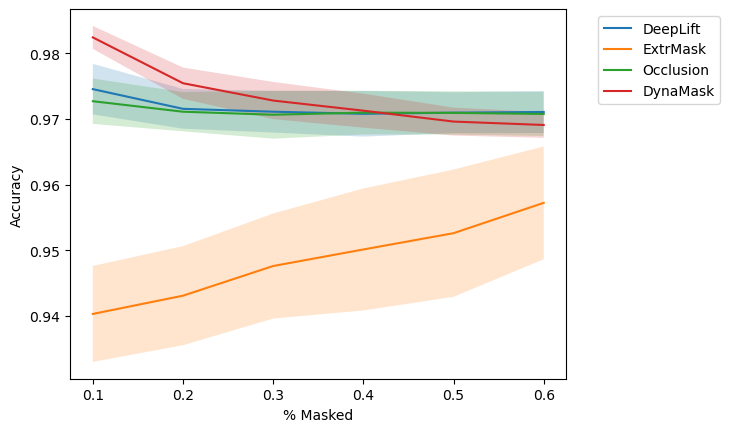

<Figure size 640x480 with 0 Axes>

In [5]:
result = (Summarizer("paper_csvs/mimic/results")
          .display_table(only_02=True)  # Key = (Evaluation Perturbation, % masked, method, lambda_1, lambda_2)
          .make_plots(explainers=["deep_lift", "extremal_mask", "occlusion", "dyna_mask"], metrics=["acc"]))  # Optional on metrics: "comp" "logodds" "CE" "suff"

##### MIMIC-III ablation study from the original paper

In [6]:
result = (Summarizer("paper_csvs/mimic/lambda_study")
 .display_table(only_02=True, lambdas=True, zeros=True)  # With replacing masked values with zeros
 .display_table(only_02=True, lambdas=True, zeros=False))  # With replacing masked values with the average

+------+-----------------+-----------------+-----------------+-----------------+-----------------+
|      |       0.01      |       0.1       |       1.0       |       10.0      |      100.0      |
+------+-----------------+-----------------+-----------------+-----------------+-----------------+
| 0.01 | 0.92570-0.34820 | 0.96532-0.16020 | 0.96768-0.18566 | 0.96766-0.16482 | 0.95574-0.16922 |
| 0.1  | 0.89278-0.50308 | 0.93512-0.32798 | 0.96102-0.16630 | 0.96124-0.26104 | 0.93584-0.27164 |
|  1   | 0.88142-0.53388 | 0.89914-0.49102 | 0.94678-0.28412 | 0.95674-0.19066 | 0.96018-0.26184 |
|  10  | 0.85714-0.53970 | 0.90456-0.47974 | 0.93984-0.37210 | 0.95030-0.26584 | 0.96412-0.16304 |
| 100  | 0.86172-0.54292 | 0.91028-0.47196 | 0.94698-0.36194 | 0.94614-0.28868 | 0.95594-0.17314 |
+------+-----------------+-----------------+-----------------+-----------------+-----------------+ 

+------+-----------------+-----------------+-----------------+-----------------+-----------------+
|      |

##### MIMIC-III deletion vs preservation game study from the original paper

In [7]:
result = Summarizer("paper_csvs/mimic/loss_study").display_table(only_02=True)  # Key = (Evaluation Perturbation, % masked, method, lambda_1, lambda_2, preservation_game)

+------------------------------------------------------------+-------------------+--------------------+--------------------+-------------------+--------------------+
|                            Key                             |        acc        |        comp        |      logodds       |         CE        |        suff        |
+------------------------------------------------------------+-------------------+--------------------+--------------------+-------------------+--------------------+
| ('Average', '0.2', 'extremal_mask', '1.0', '1.0', 'False') | 0.98290 (0.00417) | 0.01482 (0.00673)  | -0.02318 (0.00914) | 0.11962 (0.01380) | -0.01190 (0.00570) |
|  ('Zeros', '0.2', 'extremal_mask', '1.0', '1.0', 'False')  | 0.94380 (0.01157) | 0.10464 (0.04376)  | -0.20418 (0.07434) | 0.30064 (0.07809) | -0.06698 (0.01194) |
| ('Average', '0.2', 'extremal_mask', '1.0', '1.0', 'True')  | 0.99086 (0.00175) | -0.00400 (0.00186) | 0.00365 (0.00214)  | 0.09332 (0.01100) | 0.00767 (0.00363)  |
|  (

##### MIMIC-III pertubation generator study from the original paper

+----------------------------------------------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|                           Key                            |        acc        |        comp       |      logodds       |         CE        |        suff        |
+----------------------------------------------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|  ('Average', '0.2', 'extremal_mask_none', '1.0', '1.0')  | 0.98078 (0.00315) | 0.01359 (0.00110) | -0.02293 (0.00200) | 0.11622 (0.00406) | -0.01020 (0.00163) |
|  ('Average', '0.2', 'extremal_mask_gru', '1.0', '1.0')   | 0.97970 (0.00387) | 0.01761 (0.00071) | -0.02840 (0.00180) | 0.12170 (0.00382) | -0.01374 (0.00193) |
| ('Average', '0.2', 'extremal_mask_bi_gru', '1.0', '1.0') | 0.98132 (0.00413) | 0.01534 (0.00437) | -0.02513 (0.00660) | 0.11842 (0.00797) | -0.01185 (0.00446) |
|   ('Zeros', '0.2', '

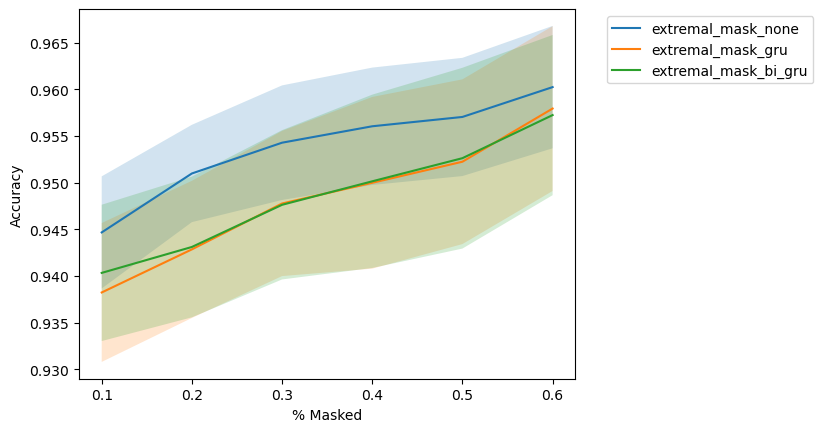

Metric acc, Baseline: Average


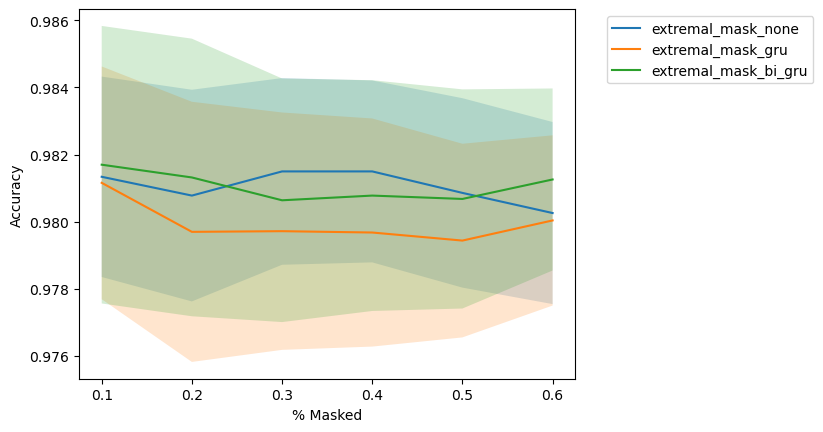

<Figure size 640x480 with 0 Axes>

In [8]:
result = (Summarizer("paper_csvs/mimic/extremal_mask_params")
          .display_table(only_02=True)  # Key = (Evaluation Perturbation, % masked, perturbation generator, lambda_1, lambda_2)
          .make_plots(explainers=["extremal_mask_none", "extremal_mask_gru", "extremal_mask_bi_gru"], baselines=["Zeros", "Average"]))

### Our experiments

#### Our main results for the HMM dataset with 20 time steps

In [9]:
results = Summarizer("t20_hmm/results").display_table()  # Key = (method, lambda_1, lambda_2)

+----------------------------------------+-------------------+-------------------+-----------------------+---------------------+-------------------+-------------------+
|                  Key                   |        aup        |        aur        |           I           |          S          |       auroc       |       auprc       |
+----------------------------------------+-------------------+-------------------+-----------------------+---------------------+-------------------+-------------------+
|      ('deep_lift', '1.0', '1.0')       | 0.90046 (0.00716) | 0.46750 (0.00228) |  364.98000 (3.65882)  | 145.52000 (1.81025) | 0.92590 (0.00353) | 0.89212 (0.00518) |
|      ('dyna_mask', '1.0', '1.0')       | 0.36414 (0.00226) | 0.78794 (0.00785) |  556.58000 (18.70179) | 124.64000 (4.21580) | 0.59998 (0.01020) | 0.37212 (0.00809) |
|  ('extremal_mask_mse', '1.0', '1.0')   | 0.90370 (0.01481) | 0.77436 (0.00591) | 1574.60000 (35.68333) |  33.91600 (1.18589) | 0.91592 (0.00402) | 0.8936

#### Our ablation study for the HMM dataset with 20 time steps

In [10]:
results = Summarizer("t20_hmm/lambda_study").display_table(lambdas=True)

+------+-----------------+-----------------+-----------------+-----------------+-----------------+
|      |       0.01      |       0.1       |       1.0       |       10.0      |      100.0      |
+------+-----------------+-----------------+-----------------+-----------------+-----------------+
| 0.01 | 0.50527-0.82180 | 0.78854-0.53882 | 0.61656-0.11206 | 0.35498-0.17768 | 0.36508-0.18370 |
| 0.1  | 0.51022-0.92314 | 0.69096-0.85702 | 0.65382-0.10697 | 0.35884-0.17772 | 0.38628-0.18858 |
|  1   | 0.50950-0.90326 | 0.68822-0.86450 | 0.90460-0.77366 | 0.39792-0.20018 | 0.38232-0.18720 |
|  10  | 0.50620-0.90044 | 0.68604-0.86442 | 0.90586-0.77618 | 0.99770-0.30260 | 0.41022-0.18754 |
| 100  | 0.50588-0.90052 | 0.68596-0.86470 | 0.90566-0.77614 | 0.99802-0.30260 | 0.40852-0.18470 |
+------+-----------------+-----------------+-----------------+-----------------+-----------------+ 



#### Our study of the deleletion game for the HMM datset with 20 time steps

Note this is not part of our paper as we present the results for 200 time steps there.

In [11]:
results = Summarizer("t20_hmm/our_loss_study").display_table()  # Without fixing the bug, Key = (method, lambda_1, lambda_2)
results = Summarizer("t20_hmm/deletion_lambda_study").display_table(lambdas=True)  # With fixing the bug

+-------------------------------------+-------------------+-------------------+-----------------------+--------------------+-------------------+-------------------+
|                 Key                 |        aup        |        aur        |           I           |         S          |       auroc       |       auprc       |
+-------------------------------------+-------------------+-------------------+-----------------------+--------------------+-------------------+-------------------+
| ('extremal_mask_mse', '1.0', '1.0') | 0.34282 (0.00487) | 0.86528 (0.01684) | 1089.00000 (64.10538) | 66.06800 (7.89126) | 0.51486 (0.02672) | 0.33746 (0.01640) |
+-------------------------------------+-------------------+-------------------+-----------------------+--------------------+-------------------+-------------------+ 

+------+-----------------+-----------------+-----------------+-----------------+-----------------+
|      |       0.01      |       0.1       |       1.0       |       10.0 

#### Our study of the deleletion game for the HMM datset with 20 time steps

In [12]:
results = Summarizer("t200_hmm/all_results").display_table()  # Key = (method, lambda_1, lambda_2)

+----------------------------------------+-------------------+-------------------+---------------------------+--------------------------+-------------------+-------------------+
|                  Key                   |        aup        |        aur        |             I             |            S             |       auroc       |       auprc       |
+----------------------------------------+-------------------+-------------------+---------------------------+--------------------------+-------------------+-------------------+
|      ('deep_lift', '1.0', '1.0')       | 0.94066 (0.00239) | 0.34332 (0.00480) |  31396.00000 (502.12548)  | 30370.00000 (202.85463)  | 0.93520 (0.00242) | 0.91028 (0.00342) |
|      ('dyna_mask', '1.0', '1.0')       | 0.37956 (0.00435) | 0.76790 (0.00214) |  102940.00000 (630.87241) | 25780.00000 (185.47237)  | 0.62360 (0.00606) | 0.42296 (0.00577) |
|    ('extremal_mask', '1.0', '1.0')     | 0.91448 (0.01183) | 0.76296 (0.00621) | 298220.00000 (5401.57384) |

#### Our study of the deleletion game for the HMM datset with 200 time steps

In [13]:
results = Summarizer("t200_hmm/all_results").display_table()

+----------------------------------------+-------------------+-------------------+---------------------------+--------------------------+-------------------+-------------------+
|                  Key                   |        aup        |        aur        |             I             |            S             |       auroc       |       auprc       |
+----------------------------------------+-------------------+-------------------+---------------------------+--------------------------+-------------------+-------------------+
|      ('deep_lift', '1.0', '1.0')       | 0.94066 (0.00239) | 0.34332 (0.00480) |  31396.00000 (502.12548)  | 30370.00000 (202.85463)  | 0.93520 (0.00242) | 0.91028 (0.00342) |
|      ('dyna_mask', '1.0', '1.0')       | 0.37956 (0.00435) | 0.76790 (0.00214) |  102940.00000 (630.87241) | 25780.00000 (185.47237)  | 0.62360 (0.00606) | 0.42296 (0.00577) |
|    ('extremal_mask', '1.0', '1.0')     | 0.91448 (0.01183) | 0.76296 (0.00621) | 298220.00000 (5401.57384) |

#### Our study of the deleletion game for the HMM datset with 200 time steps

In [14]:
results = Summarizer("t200_hmm/deletion_study").display_table()  # The first row is with the improved loss function and without the bug. The second row is without the improved loss function and with bug

+-----------------------------------------+-------------------+-------------------+---------------------------+-------------------------+-------------------+-------------------+
|                   Key                   |        aup        |        aur        |             I             |            S            |       auroc       |       auprc       |
+-----------------------------------------+-------------------+-------------------+---------------------------+-------------------------+-------------------+-------------------+
|   ('extremal_mask_mse', '1.0', '1.0')   | 0.96548 (0.01468) | 0.74002 (0.00772) | 354780.00000 (4873.08937) |  4155.00000 (68.93838)  | 0.90500 (0.00598) | 0.89246 (0.01203) |
| ('extremal_mas_deletion', '1.0', '1.0') | 0.34206 (0.00060) | 0.90086 (0.00285) | 253600.00000 (2244.99443) | 11844.00000 (265.19804) | 0.52932 (0.00330) | 0.34416 (0.00191) |
+-----------------------------------------+-------------------+-------------------+---------------------------

#### Our resuts from the weather datasset

+----------------------------------------------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|                           Key                            |        acc        |        comp       |      logodds       |         CE        |        suff        |
+----------------------------------------------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|      ('Average', '0.2', 'deep_lift', '1.0', '1.0')       | 0.72500 (0.04835) | 0.16316 (0.02335) | -0.27294 (0.04173) | 0.53982 (0.04458) | 0.02712 (0.01369)  |
|      ('Average', '0.2', 'dyna_mask', '1.0', '1.0')       | 0.45200 (0.04932) | 0.30550 (0.03011) | -0.71164 (0.10535) | 0.97868 (0.11011) | -0.04133 (0.01530) |
|    ('Average', '0.2', 'extremal_mask', '1.0', '1.0')     | 0.39400 (0.07012) | 0.33608 (0.03060) | -0.70940 (0.08109) | 0.97622 (0.08254) | -0.11972 (0.01149) |
|         ('Average', 

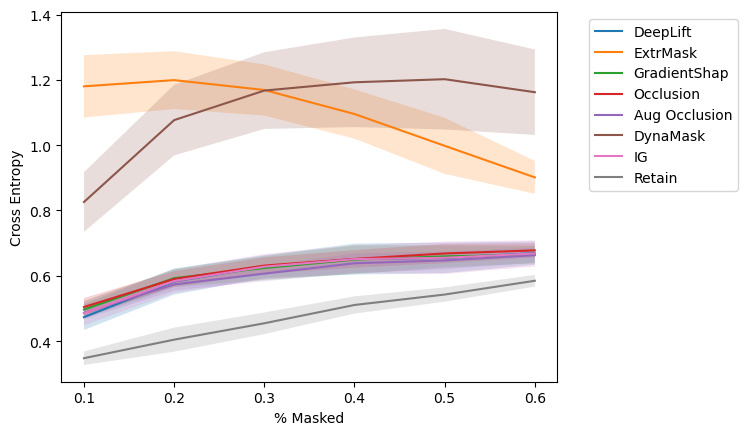

Metric CE, Baseline: Average


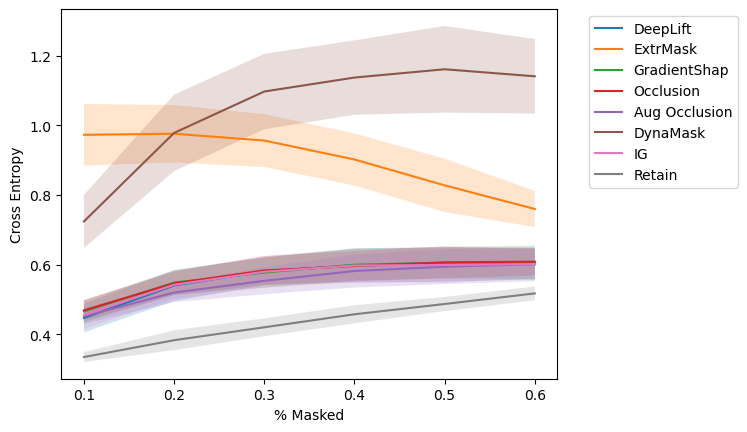

Metric acc, Baseline: Zeros


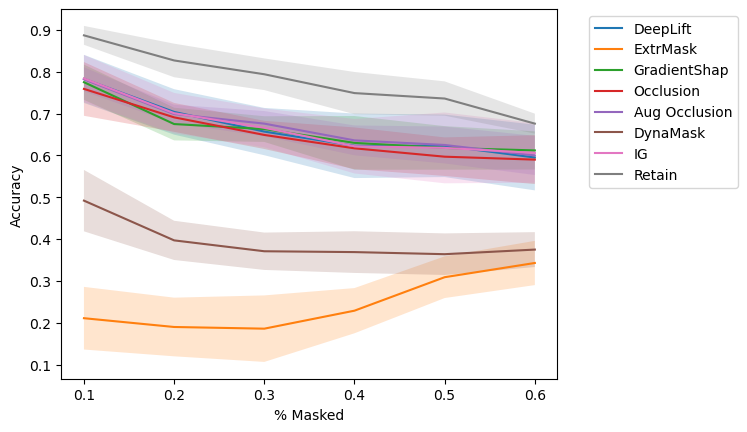

Metric acc, Baseline: Average


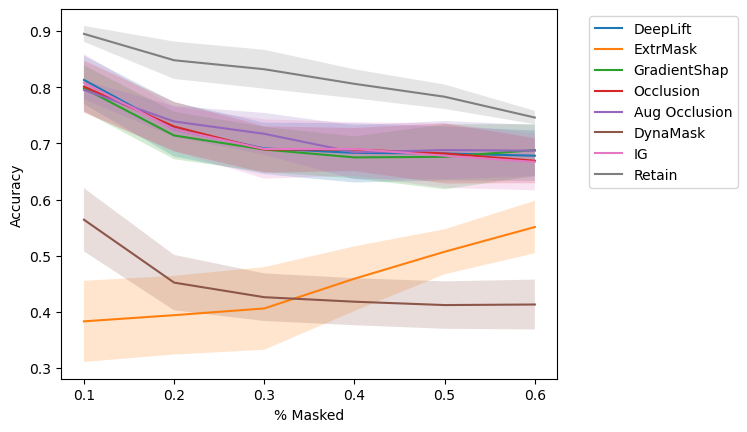

Metric comp, Baseline: Zeros


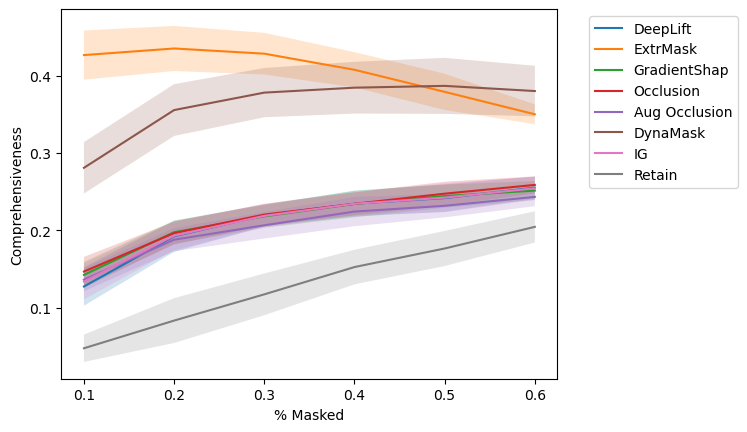

Metric comp, Baseline: Average


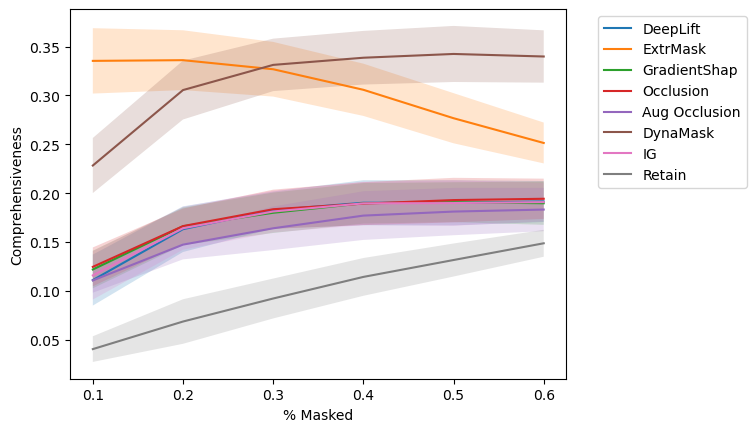

Metric suff, Baseline: Zeros


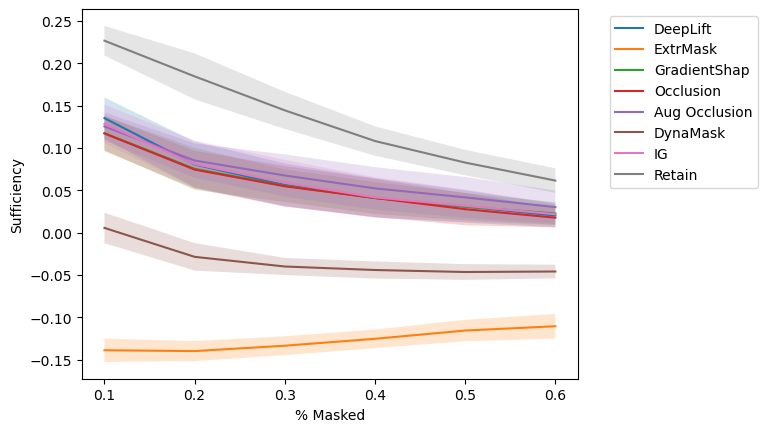

Metric suff, Baseline: Average


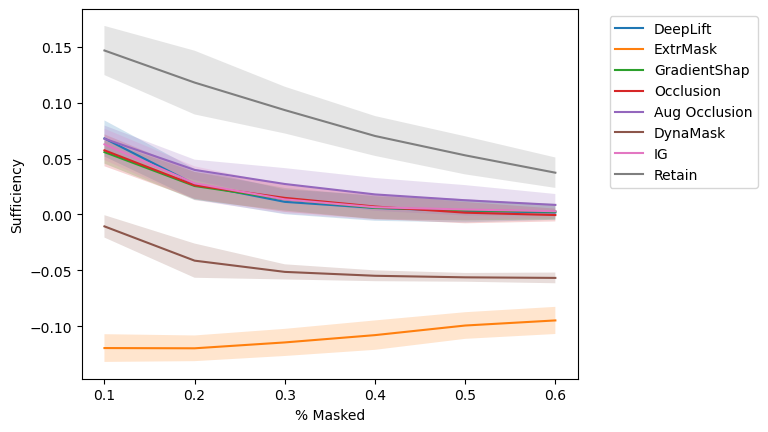

In [3]:
results = (Summarizer("weather/results")
           .display_table(only_02=True)  # Key = (Evaluation Perturbation, % masked, method, lambda_1, lambda_2)
           .make_plots(explainers=["deep_lift", "extremal_mask", "gradient_shap", "occlusion", "augmented_occlusion", "dyna_mask", "integrated_gradients", "retain"],
                        baselines=["Zeros", "Average"],
                        metrics=["CE", "acc", "comp", "suff"]))  # Addtional possible metrics: "acc", "comp", "suff"

##### Our main results on the MIMIC-III dataset

+----------------------------------------------------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|                              Key                               |        acc        |        comp       |      logodds       |         CE        |        suff        |
+----------------------------------------------------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|         ('Average', '0.2', 'deep_lift', '1.0', '1.0')          | 0.97992 (0.00256) | 0.00292 (0.00247) | -0.00843 (0.00232) | 0.13060 (0.00799) | 0.01419 (0.00428)  |
|         ('Average', '0.2', 'dyna_mask', '1.0', '1.0')          | 0.97296 (0.00469) | 0.01581 (0.00426) | -0.02543 (0.00649) | 0.14760 (0.00716) | 0.00425 (0.00367)  |
|       ('Average', '0.2', 'extremal_mask', '1.0', '1.0')        | 0.96756 (0.00375) | 0.02207 (0.00557) | -0.03692 (0.00692) | 0.15908 (0.01122) | -0.0044

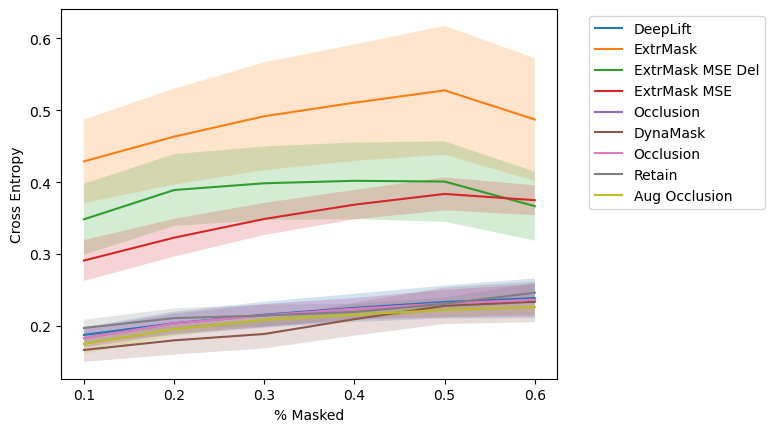

Metric CE, Baseline: Average


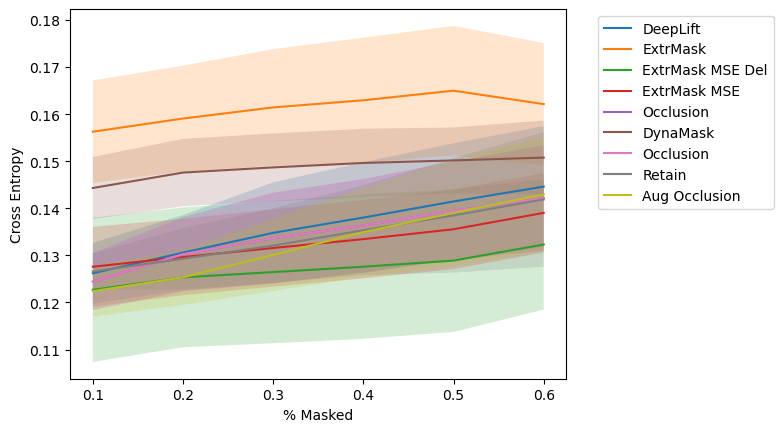

Metric acc, Baseline: Zeros


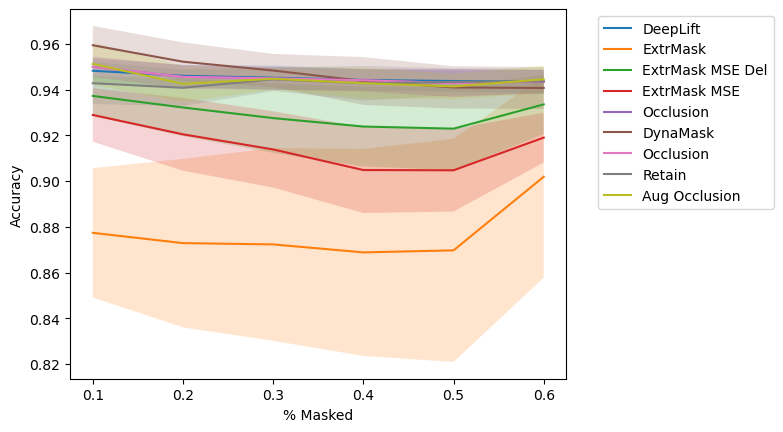

Metric acc, Baseline: Average


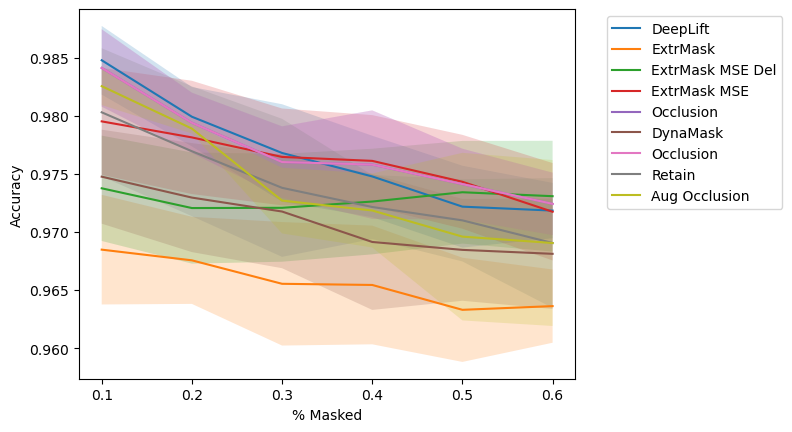

Metric comp, Baseline: Zeros


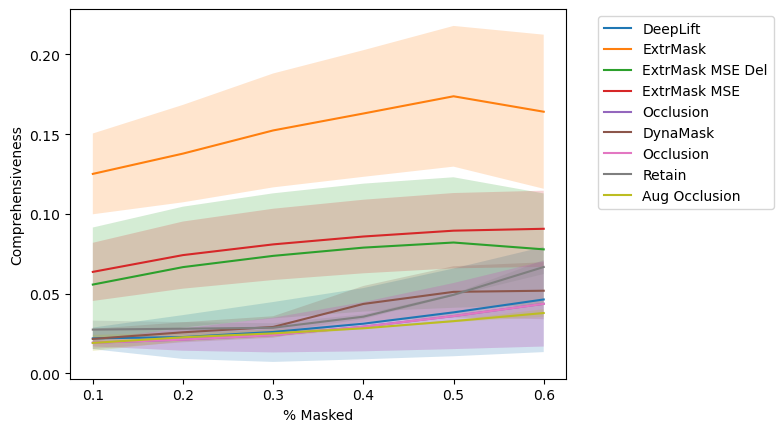

Metric comp, Baseline: Average


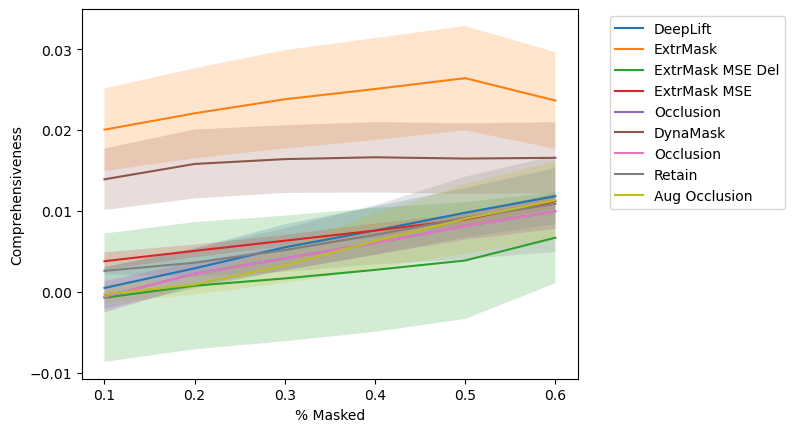

Metric suff, Baseline: Zeros


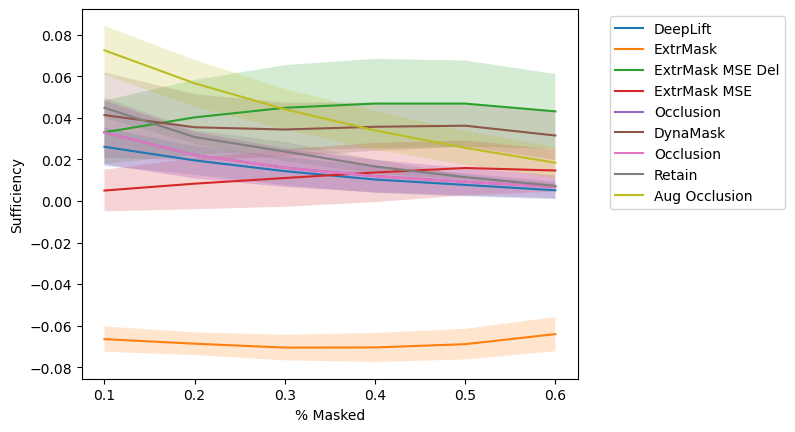

Metric suff, Baseline: Average


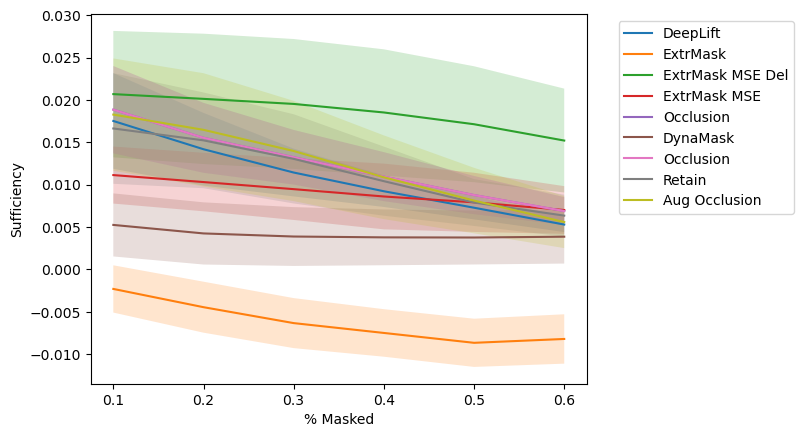

In [4]:
results = (Summarizer("mimic_repro/main")
           .display_table(only_02=True)
           .make_plots(explainers=["deep_lift", "extremal_mask", "extremal_mask_mse_deletion", "extremal_mask_mse", "occlusion", "dyna_mask", "occlusion", "retain", "augmented_occlusion"],
                       baselines=["Zeros", "Average"],
                       metrics=["CE"]))   # Addtional possible metrics: "acc" "comp" "suff"

##### Our perturbation generator study on the MIMIC-III dataset

+------------------------------------------------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|                            Key                             |        acc        |        comp       |      logodds       |         CE        |        suff        |
+------------------------------------------------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|  ('Average', '0.2', 'extremal_mask_uni_ce', '1.0', '1.0')  | 0.95698 (0.01503) | 0.03352 (0.00616) | -0.05603 (0.01489) | 0.17282 (0.02594) | -0.01281 (0.00423) |
|   ('Zeros', '0.2', 'extremal_mask_uni_ce', '1.0', '1.0')   | 0.78232 (0.10359) | 0.22172 (0.06000) | -0.52314 (0.17356) | 0.63992 (0.18479) | -0.08644 (0.01076) |
| ('Average', '0.2', 'extremal_mask_uni_mse', '1.0', '1.0')  | 0.97670 (0.00531) | 0.00617 (0.00594) | -0.01274 (0.00916) | 0.13364 (0.02187) | 0.01154 (0.00277)  |
|  ('Zeros

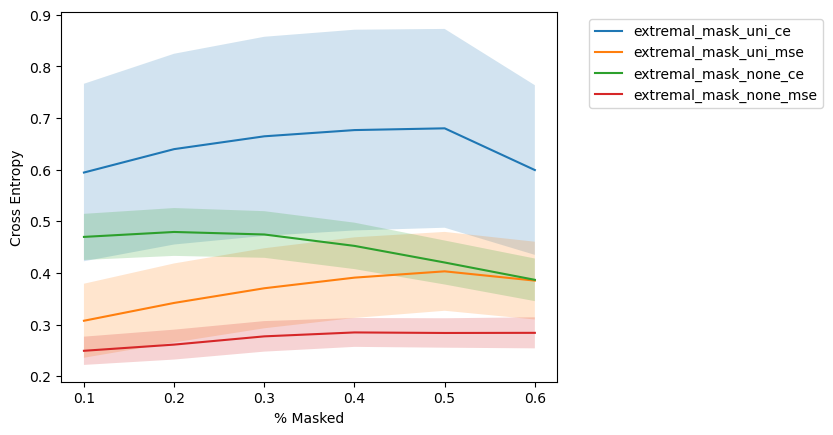

Metric CE, Baseline: Average


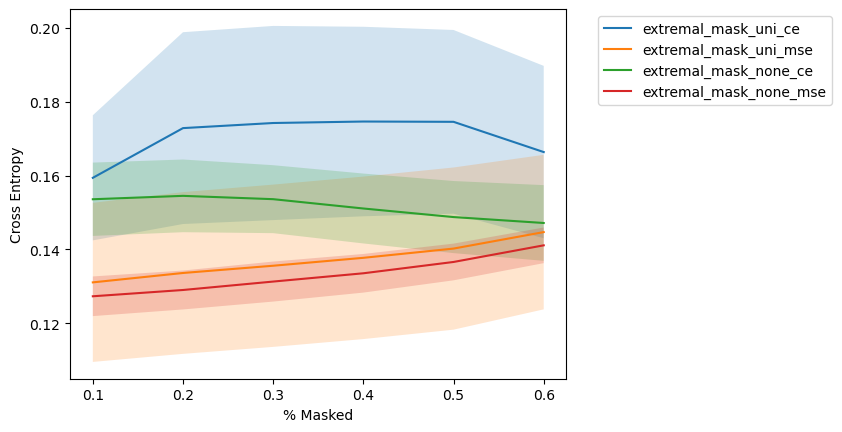

<Figure size 640x480 with 0 Axes>

In [18]:
results = (Summarizer("mimic_repro/uniandzeros")
           .display_table(only_02=True)
           .make_plots(explainers=["extremal_mask_uni_ce", "extremal_mask_uni_mse", "extremal_mask_none_ce", "extremal_mask_none_mse"],
                       baselines=["Zeros", "Average"],
                       metrics=["CE"]))  # Addtional possible metrics: "acc" "comp" "suff"

##### Our feature attribution study with the MSE loss function

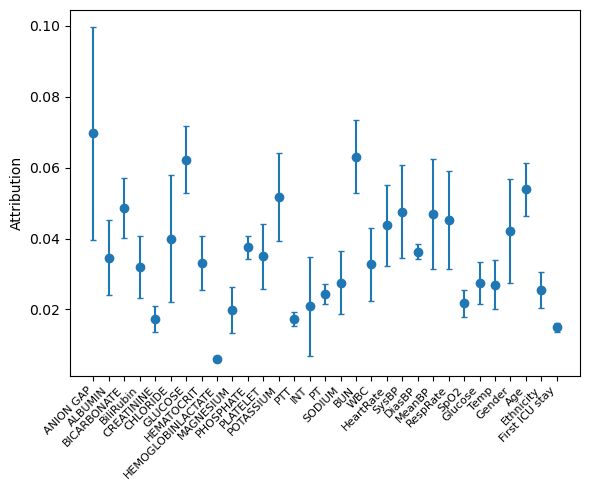

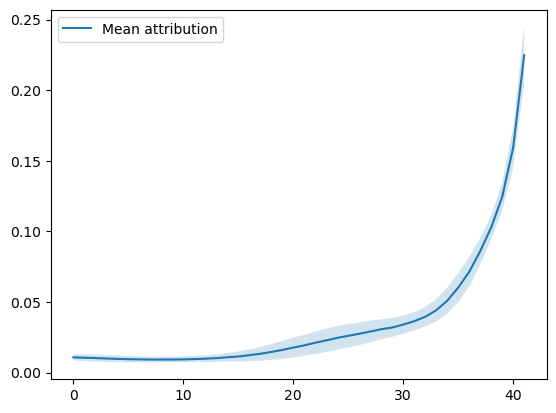

In [2]:
results = (AttributionVisualizer("mse")
           .plot_feature_attribution()
           .plot_mean_attribution_over_time())

##### Our feature attribution study with the CE loss function

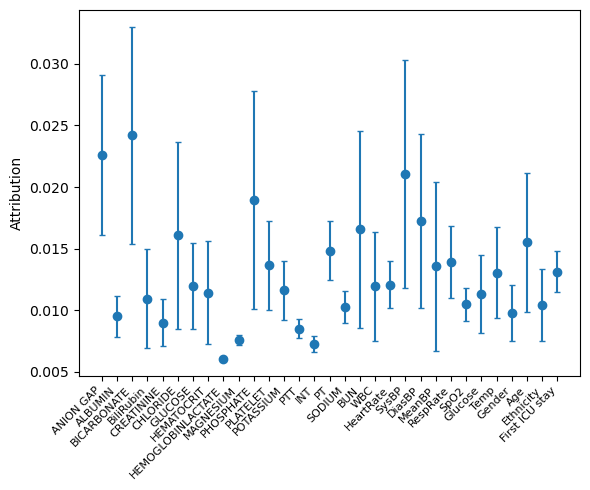

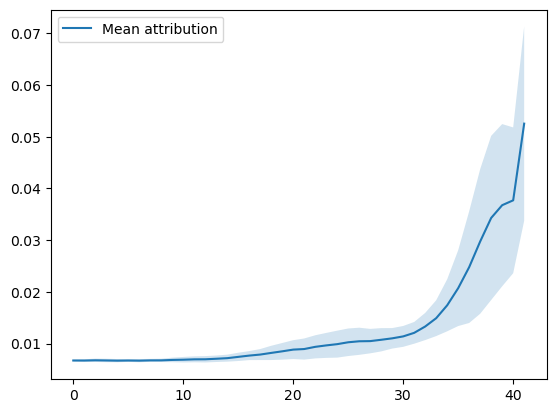

In [3]:
results = (AttributionVisualizer("ce")
           .plot_feature_attribution()
           .plot_mean_attribution_over_time())